In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Necessary to import pypwaves_updated.py from parent directory
import sys
sys.path.append('../')
import pypwaves_updated as pw

In [3]:
# Load data 
pls_file = "../../Data/161726/10552_NYU_M2_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_161726_1 - originalpoints.pls"
pulsewave = pw.openPLS(pls_file)

VLR record length:  216
VLR record length:  72
VLR record length:  130
VLR record length:  248
VLR record length:  1184
Table size:  76
LookupTable size:  84
Inner table size:  1024
num_entries:  256
VLR record length:  1184
Table size:  76
LookupTable size:  84
Inner table size:  1024
num_entries:  256
VLR record length:  196
VLR record length:  300
VLR record length:  404
VLR record length:  300
VLR record length:  404
VLR record length:  404
VLR record length:  300
VLR record length:  404
VLR record length:  404
VLR record length:  404
VLR record length:  404
VLR record length:  300


### Looking at anchor points
I'm trying to determine whether or not anchor points indicate the location of the emitter when the pulse is sent/received, or is an arbitrary point.

In [72]:
def pull_anchors(pulsewave):
    '''this function collects the x,y, and z anchors for each point in the pulsewave object.'''
    # Extract all the anchor points in each dimension
    x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(pulsewave.num_pulses)]
    y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(pulsewave.num_pulses)]
    z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(pulsewave.num_pulses)]

    # Create numpy array and pandas DF for easier manipulation
    anchor_arr = np.array([x_anchors,y_anchors,z_anchors])
    anchor_df = pd.DataFrame(anchor_arr.T,columns=['x','y','z'])
    return anchor_df

def denoise(df,low_quantile,high_quantile):
    '''takes the output of pull_anchors function, removes the outliers based on quantiles.'''
    quantile_10 = df.quantile(low_quantile)
    quantile_90 = df.quantile(high_quantile)
    df_denoised = df[df['x']>=quantile_10['x']]
    df_denoised = df_denoised[df_denoised['y']>=quantile_10['y']]
    df_denoised = df_denoised[df_denoised['z']>=quantile_10['z']]
    df_denoised = df_denoised[df_denoised['x']<=quantile_90['x']]
    df_denoised = df_denoised[df_denoised['y']<=quantile_90['y']]
    df_denoised = df_denoised[df_denoised['z']<=quantile_90['z']]
    return df_denoised

anchor_df = pull_anchors(pulsewave)
df_denoised = denoise(anchor_df)

In [84]:
# I'm comparing the min and max to the 0.1 and 0.9 quantiles...
anchor_df.describe()

,x,y,z
count,6.104083e+06,6.104083e+06,6.104083e+06
mean,9.799001e+05,1.734114e+05,1.075319e+03
std,5.149093e+01,7.107422e+02,2.545051e+02
min,9.795642e+05,1.722204e+05,3.840118e+02
25%,9.798937e+05,1.727913e+05,1.126587e+03
50%,9.798989e+05,1.733636e+05,1.144316e+03
75%,9.799062e+05,1.740203e+05,1.157218e+03
max,9.802322e+05,1.747260e+05,1.330578e+03


In [62]:
anchor_df.quantile([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9])

,x,y,z
0.01,979713.084115,172281.31766,403.863455
0.10,979870.898800,172469.72250,457.422750
0.20,979891.501750,172684.31190,1124.639250
0.30,979894.552000,172895.91625,1129.410000
0.40,979895.927750,173124.96065,1137.719500
0.50,979898.920250,173363.61975,1144.316250
0.60,979902.111000,173611.08630,1148.944500
0.70,979904.970250,173878.74400,1155.339750
0.80,979907.304000,174159.12070,1235.538250
0.90,979923.934750,174441.04245,1271.632750


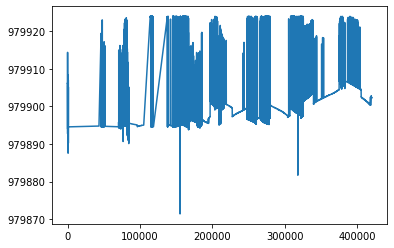

In [81]:
plt.plot(df_denoised['x'][:300000])

bits per sample:  8
num samples:  24
bits anchor:  32
bits per sample:  8
num samples:  120
bits anchor:  32


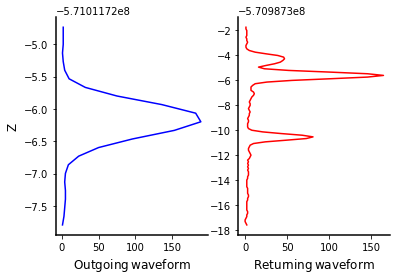

In [6]:
wave = pulsewave.get_waves(5)
wave.plot()

In [ ]:
wave.smooth(7,3)
wave.plot()

In [7]:
wave = pulsewave.get_waves(50)
type(wave)

bits per sample:  8
num samples:  24
bits anchor:  32
bits per sample:  8
num samples:  60
bits anchor:  32
bits per sample:  8
num samples:  60
bits anchor:  32


pypwaves_updated.Waves

In [ ]:
# pulse = pulsewave.get_pulse(10000)
# pulse.x_target

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict.keys():
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key])

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     tiff_tag = pulsewave.vlrs[34735].record.key_entry_dict[key].tiff_tag_location
#     if tiff_tag == 34736:
#         offset_6 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         value_6 = pulsewave.vlrs[34736].record[offset_6]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_6
#     elif tiff_tag == 34737:
#         offset_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         len_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].count
#         value_7 = pulsewave.vlrs[34737].record[offset_7:(offset_7+len_7)]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_7
#     else:
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key].value)

In [23]:
header_attrs = ['filename',
'file_sig',
'global_params',
'file_id',
'proj_GUID1',
'proj_GUID2',
'proj_GUID3',
'proj_GUID3',
'sys_id',
'software',
'file_day',
'file_year',
'version_maj',
'version_min',
'header_size',
'offset_to_pulses',
'num_pulses',
'pulse_format',
'pulse_attr',
'pulse_size',
'pulse_compression',
'reserved',
'num_vlr',
'num_avlr',
't_scale',
't_offset',
't_min',
't_max',
'x_scale',
'y_scale',
'z_scale',
'x_offset',
'y_offset',
'z_offset',
'x_min',
'x_max',
'y_min',
'y_max',
'z_min',
'z_max',]

def print_pulsewaves_header(pulsewave,header_attrs):
    '''prints all the header attribtes of a PulseWaves class.'''
    for attr in header_attrs:
        print(attr,": ",getattr(pulsewave,attr))

In [24]:
print_header(pulsewave,header_attrs)

filename :  ../../Data/161726/10552_NYU_M2_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_161726_1 - originalpoints.pls
file_sig :  PulseWavesPulse
global_params :  0
file_id :  0
proj_GUID1 :  1900857167
proj_GUID2 :  41870
proj_GUID3 :  138
proj_GUID3 :  138
sys_id :  RiPROCESS 1.8.5
software :  PulseWaves DLL 0.3 r11 (150617) by rapidlasso
file_day :  149
file_year :  2019
version_maj :  0
version_min :  3
header_size :  352
offset_to_pulses :  9338
num_pulses :  6104083
pulse_format :  0
pulse_attr :  0
pulse_size :  48
pulse_compression :  0
reserved :  0
num_vlr :  18
num_avlr :  0
t_scale :  1e-06
t_offset :  0.0
t_min :  577048595663
t_max :  577077114980
x_scale :  0.00025
y_scale :  0.00025
z_scale :  0.00025
x_offset :  979895.0
y_offset :  172379.0
z_offset :  1139.0
x_min :  979415.35275
x_max :  980382.17575
y_min :  172202.27225
y_max :  174732.357
z_min :  47.50549999999998
z_max :  1406.8435


18